# HEALTH TEST BY BLOOD
## DIABETES CLASSIFICATION

- *Age:* This represents the age of the individual in years.
- Gender: This represents the gender of the individual, typically encoded as "M" for male and "F" for female.
- BMI (Body Mass Index): This is a measure of body fat based on height and weight. It's calculated by dividing weight in kilograms by the square of height in meters.
- Chol (Total Cholesterol): This is the total amount of cholesterol present in the blood, measured in mmol/L or mg/dL.
- TG (Triglycerides): Triglycerides are a type of fat found in the blood. High levels can increase the risk of heart disease, especially in combination with low HDL cholesterol levels.
- HDL (High-Density Lipoprotein): Commonly known as "good" cholesterol, higher levels of HDL are associated with a lower risk of heart disease.
- LDL (Low-Density Lipoprotein): Often referred to as "bad" cholesterol, high levels of LDL can increase the risk of heart disease.
- Cr (Creatinine): This is a waste product produced by muscles from the breakdown of a compound called creatine. It's filtered out of the blood by the kidneys and excreted in urine.
- BUN (Blood Urea Nitrogen): This is a measure of the amount of urea nitrogen in the blood. It's an indicator of kidney function.
- Diagnosis: This is the target variable indicating whether the individual has a certain medical condition (0 for no diagnosis, 1 for diagnosis).

In [155]:
# !pip install pandas numpy seaborn matplotlib sklearn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import warnings

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score, ConfusionMatrixDisplay, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')

In [195]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\health test by blood dataset\Diabetes Classification.csv")
df.head()

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [196]:
df.shape

(5132, 11)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5132 non-null   int64  
 1   Age         5132 non-null   int64  
 2   Gender      5132 non-null   object 
 3   BMI         5132 non-null   int64  
 4   Chol        5132 non-null   float64
 5   TG          5132 non-null   float64
 6   HDL         5132 non-null   float64
 7   LDL         5132 non-null   float64
 8   Cr          5132 non-null   float64
 9   BUN         5132 non-null   float64
 10  Diagnosis   5132 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 441.2+ KB


In [198]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Gender        0
BMI           0
Chol          0
TG            0
HDL           0
LDL           0
Cr            0
BUN           0
Diagnosis     0
dtype: int64

In [199]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [200]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [201]:
df.describe().round()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.0,5132.0,5132.0,5132.0,5132.0,5132.0,5132.0,5132.0,5132.0
mean,49.0,25.0,5.0,2.0,2.0,3.0,71.0,5.0,0.0
std,14.0,4.0,1.0,1.0,1.0,1.0,28.0,2.0,0.0
min,20.0,15.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
25%,36.0,22.0,4.0,1.0,1.0,2.0,58.0,4.0,0.0
50%,49.0,24.0,5.0,1.0,1.0,3.0,70.0,5.0,0.0
75%,59.0,27.0,5.0,2.0,2.0,3.0,82.0,6.0,1.0
max,93.0,47.0,12.0,33.0,10.0,10.0,800.0,39.0,1.0


In [202]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


## 1. Classification Analysis

In [203]:

le = LabelEncoder()

def get_object(df):
    categories = (df.dtypes == 'object')
    categories = list(categories[categories].index)
    for i in categories:
        df[i] = le.fit_transform(df[i])

get_object(df)

df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [204]:
x = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (4105, 9)
x test:  (1027, 9)
y train:  (4105,)
y test:  (1027,)


In [205]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

dtc_predictions = dtc.predict(x_test)

acc_score = accuracy_score(dtc_predictions, y_test)

dtc_predictions
print(acc_score * 100)

79.35735150925024


In [206]:
dtc_predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
def model_experiment(model):
    model.fit(x_train, y_train)
    y_predictions = model.predict(x_test)

    cm = confusion_matrix(y_test, y_predictions)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    print('======================================================================================')
    print('Quantitative assessement for the ' + str(model).replace('()', '') + ' classifier model')
    print('======================================================================================')
    print('Accuracy score:', round(accuracy_score(y_test, y_predictions), 2))
    print('Precision score:', round(precision_score(y_test, y_predictions), 2))
    print('F1 score:', round(f1_score(y_test, y_predictions), 2))
    print('Recall score:', round(recall_score(y_test, y_predictions), 2))

    plt.figure(figsize=(3,3))
    cmd.plot(cmap='Blues')

   
    plt.title('Confusion Matrix for the '+ str(model).replace('()', '') + ' Classifier')
    plt.show()
    print('\n')
    print('\n')

Quantitative assessement for the DecisionTreeClassifier classifier model
Accuracy score: 0.79
Precision score: 0.72
F1 score: 0.75
Recall score: 0.77


<Figure size 300x300 with 0 Axes>

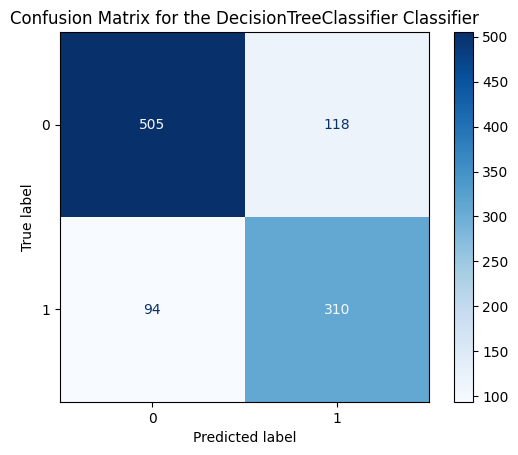





Quantitative assessement for the SVC classifier model
Accuracy score: 0.79
Precision score: 0.73
F1 score: 0.75
Recall score: 0.77


<Figure size 300x300 with 0 Axes>

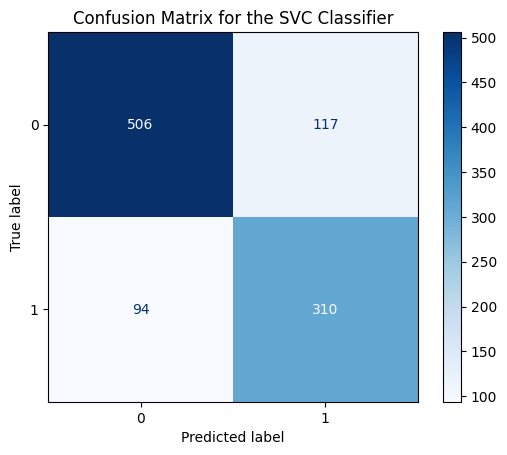





Quantitative assessement for the GradientBoostingClassifier classifier model
Accuracy score: 0.83
Precision score: 0.78
F1 score: 0.78
Recall score: 0.78


<Figure size 300x300 with 0 Axes>

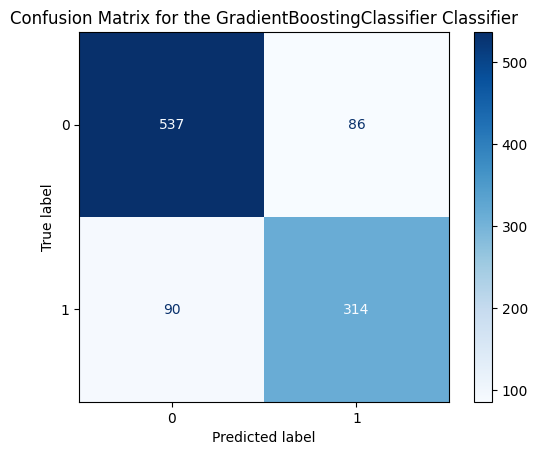





Quantitative assessement for the RandomForestClassifier classifier model
Accuracy score: 0.81
Precision score: 0.76
F1 score: 0.77
Recall score: 0.77


<Figure size 300x300 with 0 Axes>

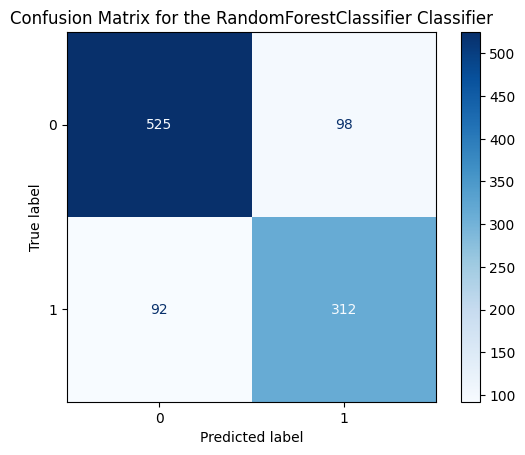

In [208]:
dtc = DecisionTreeClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()

model_experiment(dtc)
model_experiment(svc)
model_experiment(gbc)
model_experiment(rfc)

In [209]:
def manual_experiments(data, model):
    input_data = data
    input_data = np.asarray(input_data)
    reshape_data = input_data.reshape(1, -1)

    model.fit(x_train, y_train)
    y_pred = model.predict(reshape_data)

    if y_pred == 0:
        print('No Diabetes Illness detected')
    else:
        print('The patient may be suffering from the severe diabetes disease.')
        print('He/She may need to be Diagonised')

In [210]:
data = [68, 1, 34, 7.9, 9.5, 1.1, 5.4, 55.9, 3.6]

manual_experiments(data, gbc)

The patient may be suffering from the severe diabetes disease.
He/She may need to be Diagonised


In [211]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0


<Axes: title={'center': 'Pearsons Correlation of Columns'}>

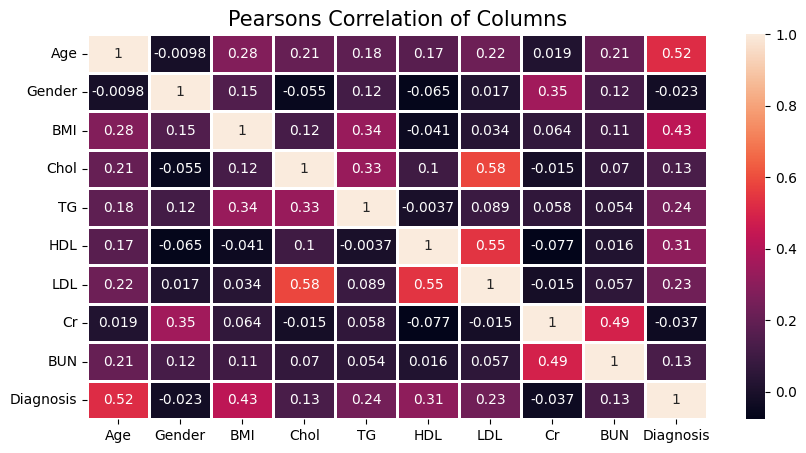

In [212]:
plt.figure(figsize=(10, 5))
plt.title('Pearsons Correlation of Columns', fontdict={'size':15})
sb.heatmap(df.corr(), annot=True, linewidths=0.8)

In [213]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0


## 2. Regression Analysis

In [214]:
x = df.drop(columns=['Cr'])
y = df['Cr']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('x train: ', x_train.shape)
print('x test: ', x_test.shape)
print('y train: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (4105, 9)
x test:  (1027, 9)
y train:  (4105,)
y test:  (1027,)


In [215]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

y_pred

array([65. , 48. , 71.8, ..., 74.3, 69.6, 59. ])

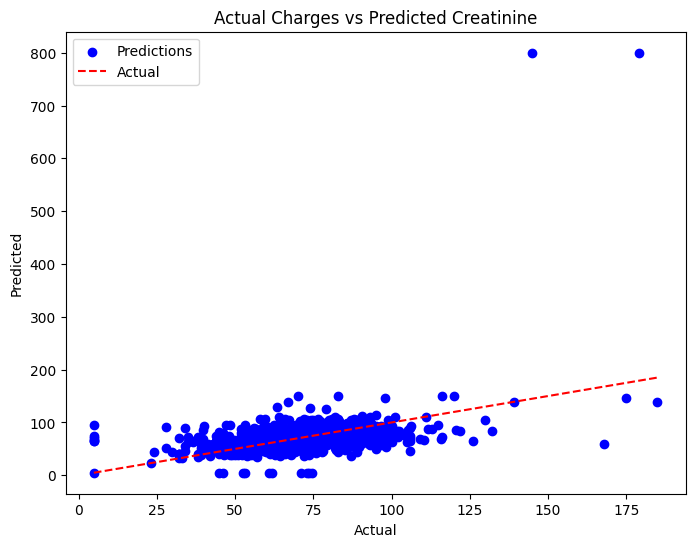

In [216]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.title('Actual Charges vs Predicted Creatinine')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [217]:
print('Regression Evaluation Metrics for the Decision Tree Regressor')
print(f'R2 Score:  {r2_score(y_test, y_pred):.4}')
print(f'Mean Absolute Error (MAE):  {mean_absolute_error(y_test, y_pred):.4}')
print(f'Mean Squared Error:  {mean_squared_error(y_test, y_pred):.9}')

Regression Evaluation Metrics for the Decision Tree Regressor
R2 Score:  -2.252
Mean Absolute Error (MAE):  15.87
Mean Squared Error:  1179.7382


In [218]:
def regression_model_trainer(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print('Regression Evaluation Metrics for the ' + str(model).replace('()', ''))
    print(f'R2 Score:  {r2_score(y_test, y_pred):.4}')
    print(f'Mean Absolute Error (MAE):  {mean_absolute_error(y_test, y_pred):.4}')
    print(f'Mean Squared Error:  {mean_squared_error(y_test, y_pred):.9}')
    print('\n')

In [219]:
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lr = LinearRegression()

regression_model_trainer(dtr)
regression_model_trainer(rfr)
regression_model_trainer(gbr)
regression_model_trainer(lr)

Regression Evaluation Metrics for the DecisionTreeRegressor
R2 Score:  -2.161
Mean Absolute Error (MAE):  15.41
Mean Squared Error:  1146.51954


Regression Evaluation Metrics for the RandomForestRegressor
R2 Score:  0.2783
Mean Absolute Error (MAE):  10.48
Mean Squared Error:  261.773319


Regression Evaluation Metrics for the GradientBoostingRegressor
R2 Score:  -0.2234
Mean Absolute Error (MAE):  10.87
Mean Squared Error:  443.762217


Regression Evaluation Metrics for the LinearRegression
R2 Score:  0.321
Mean Absolute Error (MAE):  11.68
Mean Squared Error:  246.303581




RandomForestRegressor outperforms the other models across all three evaluation metrics, making it the best choice for your regression task. It's important to note that these evaluation metrics provide different perspectives on model performance, and considering multiple metrics can give a more comprehensive assessment.

In [220]:
def series_regression_metrics(df, col):
    x = df.drop(columns=col)
    y = df[col]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=40)

    model = RandomForestRegressor()

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    print('===================================================================================================')
    print('Regression Evaluation Metrics for the ' + str(model).replace('()', '') + ' based on ' + col + ' series')
    print('===================================================================================================')
    print(f'R2 Score:  {r2_score(y_test, y_pred):.4}')
    print(f'Mean Absolute Error (MAE):  {mean_absolute_error(y_test, y_pred):.4}')
    print(f'Mean Squared Error:  {mean_squared_error(y_test, y_pred):.9}')

    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='blue', label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
    plt.title('Actual ' + str(col) +' vs Predicted ' + str(col))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()
        
    print('\n')

Regression Evaluation Metrics for the RandomForestRegressor based on Age series
R2 Score:  0.3448
Mean Absolute Error (MAE):  8.743
Mean Squared Error:  128.25299


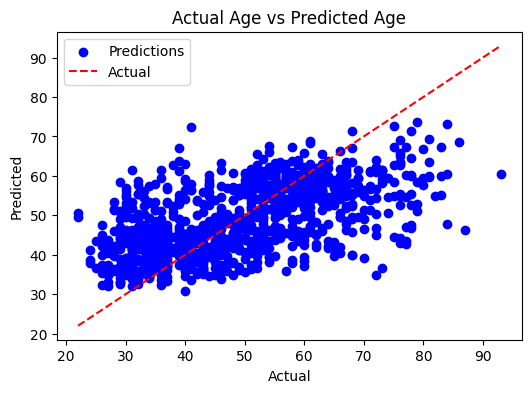



Regression Evaluation Metrics for the RandomForestRegressor based on Gender series
R2 Score:  0.5066
Mean Absolute Error (MAE):  0.2121
Mean Squared Error:  0.114671276


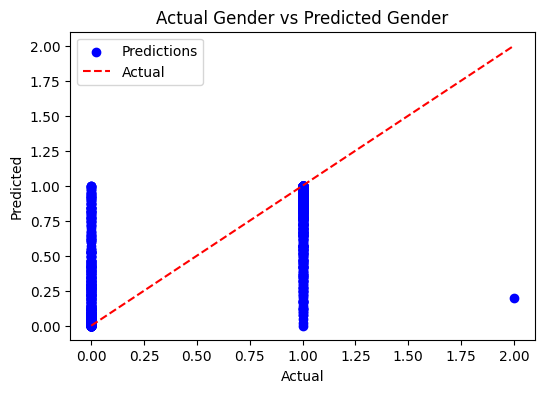



Regression Evaluation Metrics for the RandomForestRegressor based on BMI series
R2 Score:  0.3998
Mean Absolute Error (MAE):  2.575
Mean Squared Error:  10.6796763


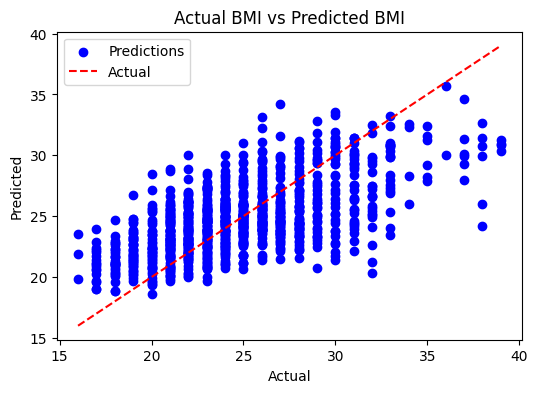



Regression Evaluation Metrics for the RandomForestRegressor based on Chol series
R2 Score:  0.6414
Mean Absolute Error (MAE):  0.3762
Mean Squared Error:  0.350236724


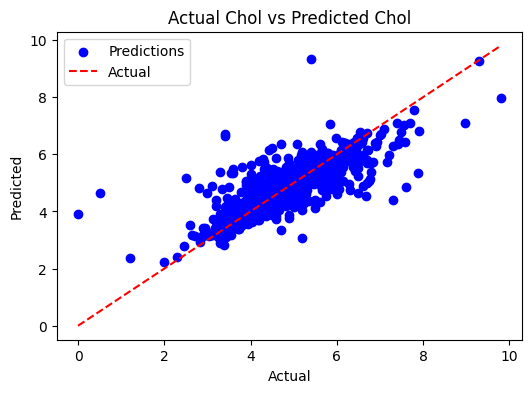



Regression Evaluation Metrics for the RandomForestRegressor based on TG series
R2 Score:  0.404
Mean Absolute Error (MAE):  0.6144
Mean Squared Error:  0.912330726


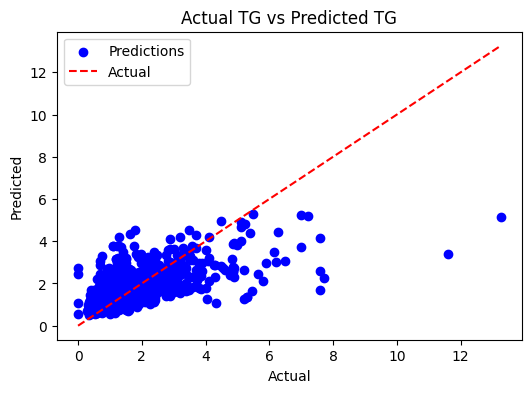



Regression Evaluation Metrics for the RandomForestRegressor based on HDL series
R2 Score:  0.8315
Mean Absolute Error (MAE):  0.2142
Mean Squared Error:  0.212095473


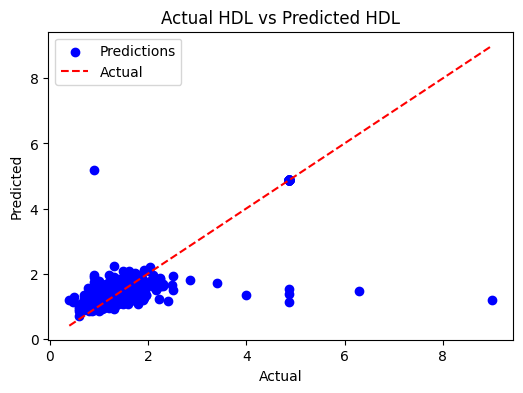



Regression Evaluation Metrics for the RandomForestRegressor based on LDL series
R2 Score:  0.7497
Mean Absolute Error (MAE):  0.2837
Mean Squared Error:  0.232003585


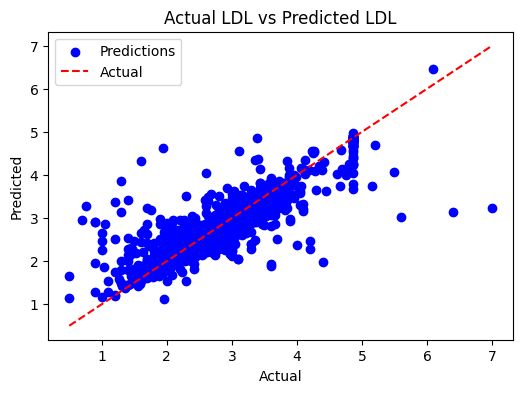



Regression Evaluation Metrics for the RandomForestRegressor based on Cr series
R2 Score:  0.2129
Mean Absolute Error (MAE):  10.65
Mean Squared Error:  285.51017


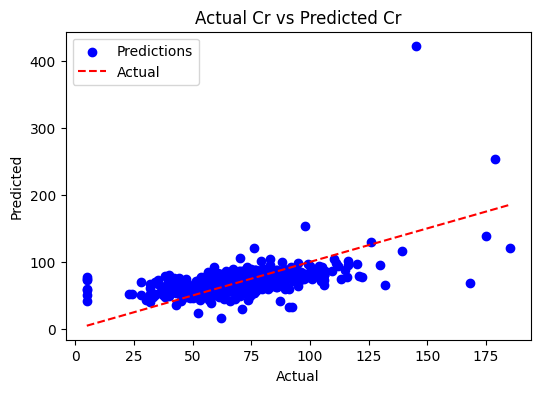



Regression Evaluation Metrics for the RandomForestRegressor based on BUN series
R2 Score:  0.2519
Mean Absolute Error (MAE):  0.9619
Mean Squared Error:  1.71880265


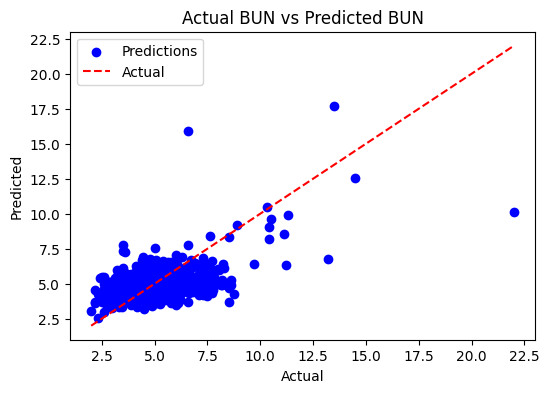



Regression Evaluation Metrics for the RandomForestRegressor based on Diagnosis series
R2 Score:  0.5078
Mean Absolute Error (MAE):  0.2244
Mean Squared Error:  0.117445251


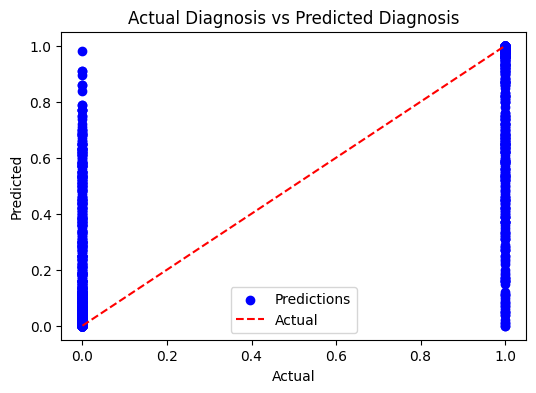

In [221]:
for i in df.columns:
    col_series = ['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN', 'Diagnosis']
    series_regression_metrics(df, i)

In [222]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0


## 3. Feature Importance Analysis
- Feature Importance Analysis is a crucial step in understanding which features contribute the most to the predictive performance of a machine learning model. In the context of predicting a medical condition diagnosis based on various features, such analysis can provide insights into the underlying factors influencing the condition

In [223]:
df_copy = pd.read_csv(r"D:\Open Classroom\Datasets\health test by blood dataset\Diabetes Classification.csv")

In [224]:

df_copy.drop(columns='Unnamed: 0', inplace=True)
df_copy['Gender'] = le.fit_transform(df_copy['Gender'])

x = df_copy.drop(columns='Diagnosis')
y = df_copy['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)



DecisionTreeClassifier()

In [225]:
permutation_imp = permutation_importance(gbc, x_test, y_test)


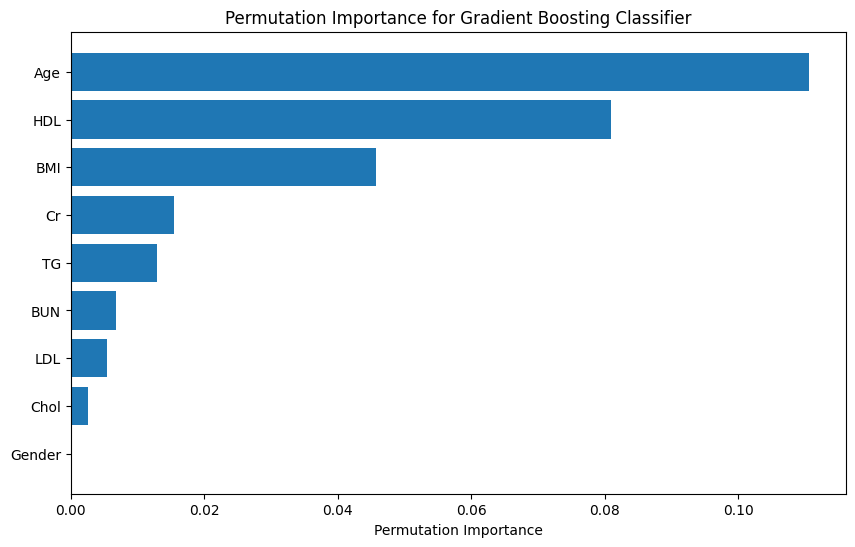

In [226]:
# Retrieve the feature importances from the permutation_importance result
perm_importances = permutation_imp.importances_mean
feature_names = x_test.columns

# Sort the features by their importance
sorted_idx = perm_importances.argsort()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Gradient Boosting Classifier')
plt.show()

In [227]:
permutation_imp.importances

array([[ 0.10808179,  0.1090555 ,  0.0993184 ,  0.12658228,  0.11002921],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.03213242,  0.04771178,  0.04479065,  0.05550146,  0.04868549],
       [ 0.00194742,  0.00194742,  0.00778968,  0.00194742, -0.00097371],
       [ 0.01655307,  0.00292113,  0.01168452,  0.01265823,  0.02044791],
       [ 0.08081792,  0.08666018,  0.07400195,  0.09055501,  0.07302824],
       [ 0.00097371,  0.00681597,  0.00876339,  0.00681597,  0.00389484],
       [ 0.01557936,  0.01752678,  0.01460565,  0.01460565,  0.01460565],
       [ 0.00292113,  0.00486855,  0.00778968,  0.00584226,  0.01265823]])

In [228]:
permutation_imp.importances_mean

array([0.11061344, 0.        , 0.04576436, 0.00253165, 0.01285297,
       0.08101266, 0.00545278, 0.01538462, 0.00681597])

In [229]:
permutation_imp.importances_std

array([0.00885166, 0.        , 0.007667  , 0.00286211, 0.00585523,
       0.00686862, 0.00272639, 0.00113553, 0.00331634])

In [230]:
df_copy2 = pd.read_csv(r"D:\Open Classroom\Datasets\health test by blood dataset\Diabetes Classification.csv")

df_copy2.drop(columns=['Unnamed: 0'], inplace=True)
df_copy2['Gender'] = le.fit_transform(df_copy2['Gender'])

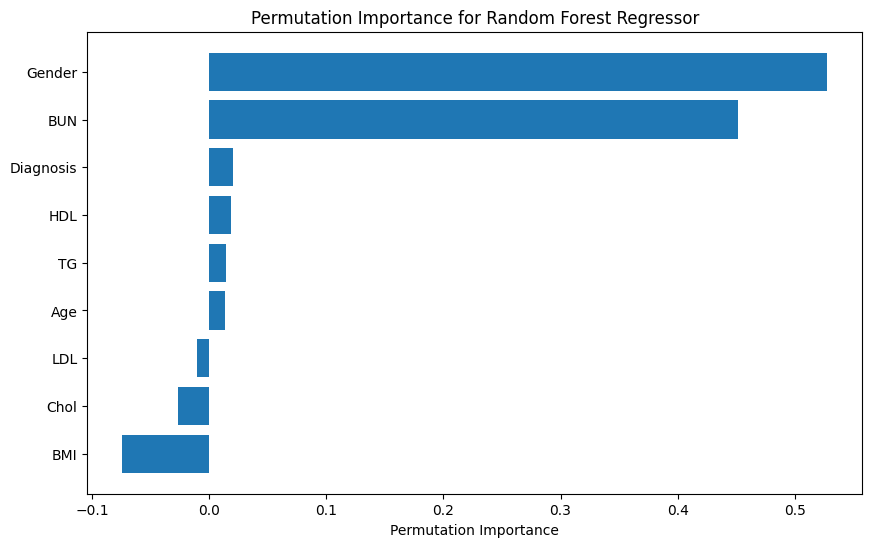

In [231]:


x = df_copy2.drop(columns=['Cr'])
y = df_copy2['Cr']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

rfr.fit(x_train, y_train)

perm_imp = permutation_importance(rfr, x_test, y_test)


pi = perm_imp.importances_mean
feature_names = x_train.columns

sorted_idx = pi.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), pi[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Random Forest Regressor')
plt.show()

## 4. Clustering

In [232]:
df.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,0,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,1,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,1,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,0,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,0,24,3.6,1.3,0.9,2.1,50.0,2.0,0


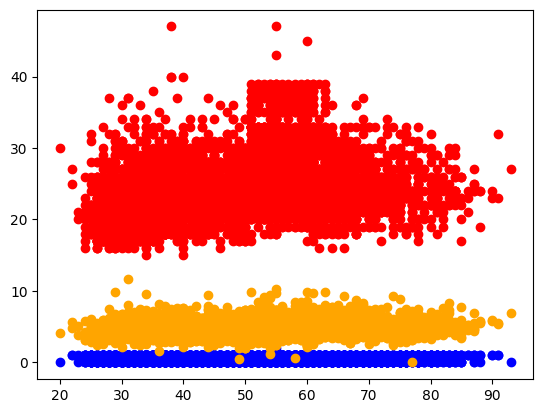

In [237]:
plt.scatter(df['Age'], df['Gender'], color='blue')
plt.scatter(df['Age'], df['BMI'], color='red')
plt.scatter(df['Age'], df['Chol'], color='orange')